In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.morphology import skeletonize, thin
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

**TODO**  
- Arreglar Microcystis aeruginosa 1  
- Dibujar elipsoide en imagen  
- Probar en imagen conjunta  

**DONE**  
- Descubrir cómo marcar los contornos interiores  
- Comprobar si puedo contar el perímetro del skeleton sin findContours (no lo he necesitado)  
- Restar el área de los contornos interiores

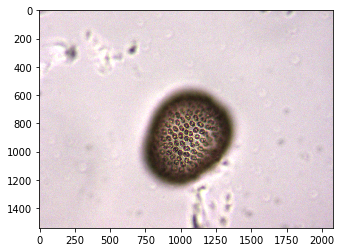

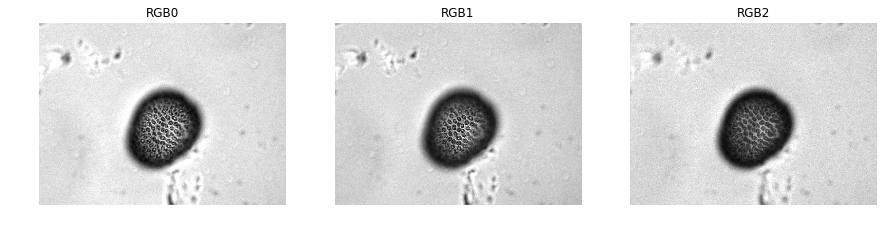

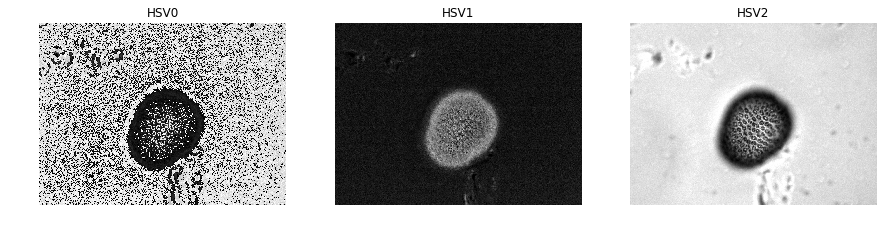

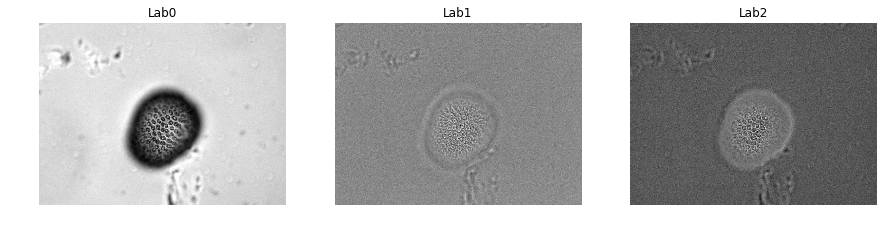

In [302]:
# im = cv2.imread('dataset/Single 40x - Anabaena spiroides 1.jpg')
# im = cv2.imread('dataset/Single 40x - Anabaena spiroides 2.jpg')
# im = cv2.imread('dataset/Single 40x - Anabaena spiroides 3.jpg')
# im = cv2.imread('dataset/Single 40x - Anabaena spiroides 4.jpg')
# im = cv2.imread('dataset/Single 40x - Microcystis aeruginosa 1.jpg')
# im = cv2.imread('dataset/Single 40x - Microcystis aeruginosa 2.jpg')
# im = cv2.imread('dataset/Single 40x - Microcystis aeruginosa 3.jpg')
# im = cv2.imread('dataset/Single 40x - Microcystis aeruginosa 4.jpg')
# im = cv2.imread('dataset/Single 40x - Microcystis flos-aquae 1.jpg')
# im = cv2.imread('dataset/Single 40x - Microcystis flos-aquae 2.jpg')
im = cv2.imread('dataset/Single 40x - Woronichinia naegeliana 1.jpg')
# im = cv2.imread('dataset/Single 40x - Woronichinia naegeliana 2.jpg')
# im = cv2.imread('dataset/Single 40x - Woronichinia naegeliana 3.jpg')
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)

images = [im_rgb, im_hsv, im_lab]
names = ['RGB', 'HSV', 'Lab']
for n, img in enumerate(images):
    fig, axeslist = plt.subplots(ncols=3, nrows=1,figsize=(15,15))
    for i in range(3):
        axeslist.ravel()[i].imshow(img[:,:,i], cmap='gray')
        axeslist.ravel()[i].set_title(names[n] + str(i))
        axeslist.ravel()[i].set_axis_off()
    plt.show()

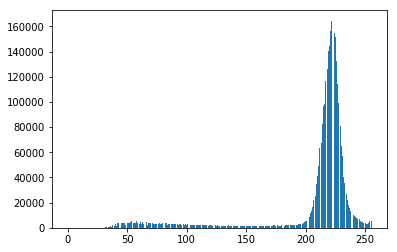

In [303]:
img = im_lab[:,:,0]
# img = 255-im_hsv[:,:,1]
hist, _ = np.histogram(img, 256, [0, 256])
plt.bar(range(0,256), hist)
plt.show()

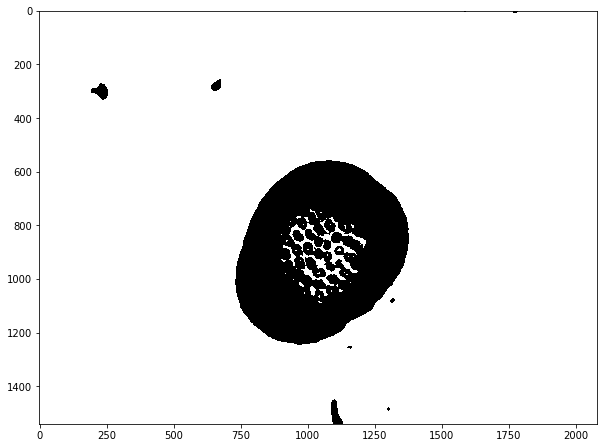

In [304]:
blur = cv2.GaussianBlur(img,(11,11),0)
ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# ret,thresh = cv2.threshold(blur,130,255,0)
plt.figure(figsize=(10,8))
plt.imshow(thresh, cmap='gray')
plt.show()

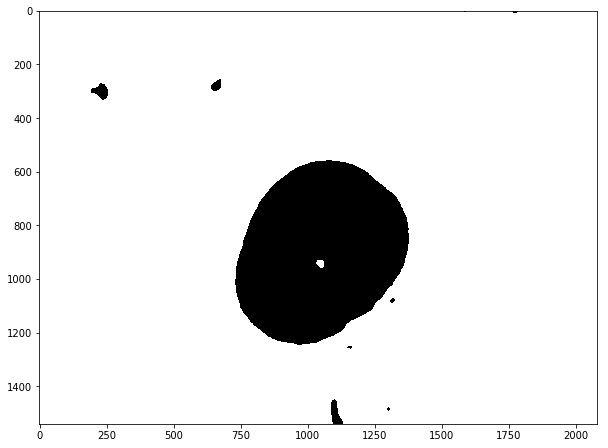

In [305]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(10,8))
plt.imshow(closing, cmap='gray')
plt.show()

In [306]:
# detect circles in the image
# circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.2, 100)

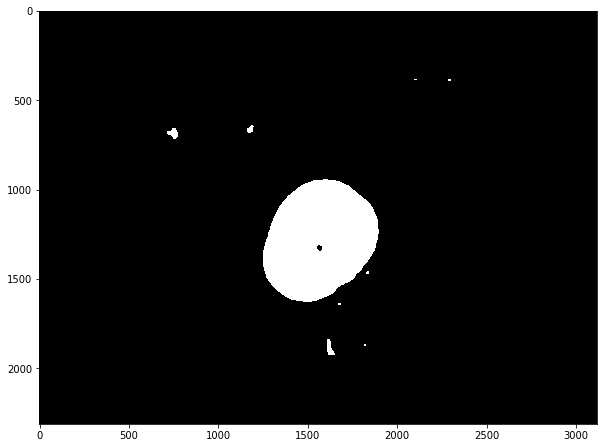

In [307]:
newimage = np.ones((int(closing.shape[0]*1.5), int(closing.shape[1]*1.5))) * 255
newimage[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)] = closing
plt.figure(figsize=(10,8))
plt.imshow(255-newimage, cmap='gray')
plt.show()

In [308]:
# from skimage import measure

In [309]:
# np.unique(labeled)

In [310]:
# labeled = measure.label(newimage, background=255)
# plt.figure(figsize=(10,8))
# plt.imshow(labeled)
# plt.show()

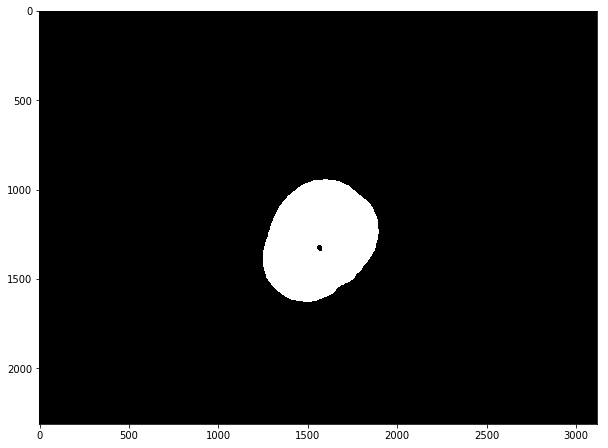

In [311]:
_, contours, hierarchy = cv2.findContours(((255-newimage)/255.0).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 

contours.sort(key=cv2.contourArea, reverse=True)
mask = np.zeros(newimage.shape,np.uint8)
cv2.drawContours(mask,contours,0,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
# cv2.drawContours(mask,contours,1,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
area = cv2.contourArea(contours[0])

for i in range(1,hierarchy.shape[1]):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(mask,contours,i,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
#         cv2.drawContours(mask,contours,i,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
        area -= cv2.contourArea(contours[i])
plt.figure(figsize=(10,8))
cv2.imwrite('area.png',mask)
plt.imshow(mask, cmap='gray')
plt.show()

In [312]:
# cv2.contourArea(contours[0])

In [313]:
# hierarchy

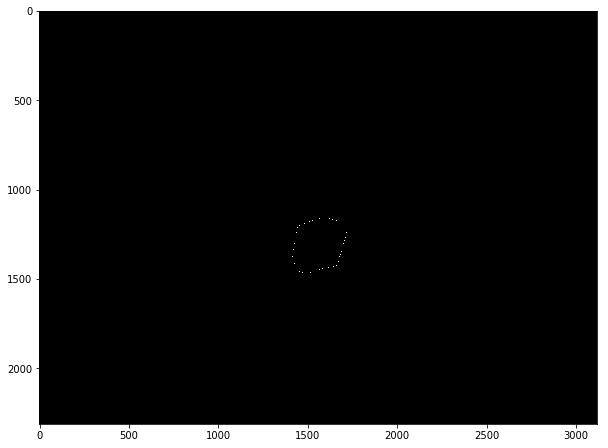

In [314]:
# perform skeletonization
# skeleton = skeletonize(image/255)
skeleton = skeletonize(mask/255)
cv2.imwrite('skeleton.png',np.uint8(skeleton)*255)
# thinned = thin(mask/255)
plt.figure(figsize=(10,8))
plt.imshow(skeleton, cmap='gray',interpolation="nearest")
plt.show()

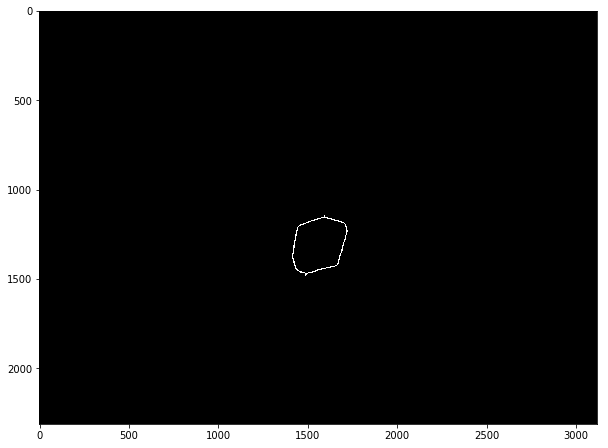

In [315]:
_, contours, hierarchy = cv2.findContours(skeleton.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
contours.sort(key=lambda c: cv2.arcLength(c, False), reverse=True)
perimeter = 0
for c in contours:
    perimeter += cv2.arcLength(c,False)
skelemask = np.zeros(skeleton.shape,np.uint8)
# cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=3)
cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=3, lineType=8, hierarchy=hierarchy)
cv2.imwrite('skelemask.png',skelemask)
plt.figure(figsize=(10,8))
plt.imshow(skelemask, cmap='gray')
plt.show()

In [316]:
# contour = np.array([list(i[0]) for i in contours[0]])
# for _ in range(5):
#     contour = subdivide_polygon(contour, degree=2, preserve_ends=True)
# # approximate subdivided polygon with Douglas-Peucker algorithm
# appr = approximate_polygon(contour, tolerance=0.02)

# plt.plot(appr[:,0], appr[:,1])

In [317]:
print('Area = {:0.2f}, Perimeter = {:0.2f}'.format(area,perimeter))
width = area/perimeter
print('Mean width = {:0.2f}'.format(width))
volume = np.pi * (width/2)*(width/2) * perimeter
print('Volume = {:0.2f}'.format(volume))
print('Ratio Area/Volume = {:0.4f}'.format(area/volume))

Area = 321476.00, Perimeter = 3317.32
Mean width = 96.91
Volume = 24468056.30
Ratio Area/Volume = 0.0131


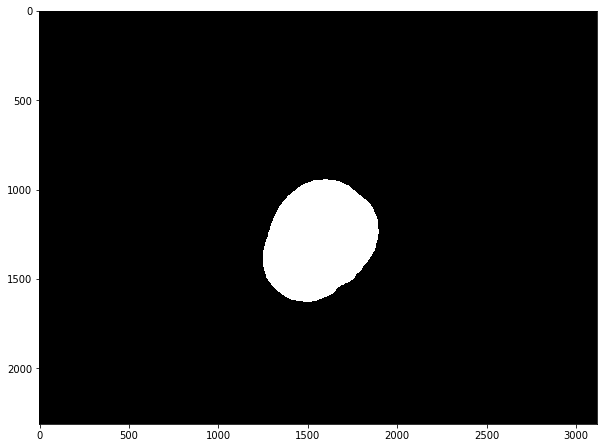

In [318]:
_, contours, hierarchy = cv2.findContours(((255-newimage)/255.0).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
contours.sort(key=cv2.contourArea, reverse=True)
newmask = np.zeros(newimage.shape,np.uint8)
cv2.drawContours(newmask,contours,0,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
area = cv2.contourArea(contours[0])
# for i in range(1,hierarchy.shape[1]):
#     if hierarchy[0][i][3] == -1:
#         cv2.drawContours(mask,contours,i,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
#         area -= cv2.contourArea(contours[i])
plt.figure(figsize=(10,8))
# cv2.imwrite('area.png',mask)
plt.imshow(newmask, cmap='gray')
plt.show()

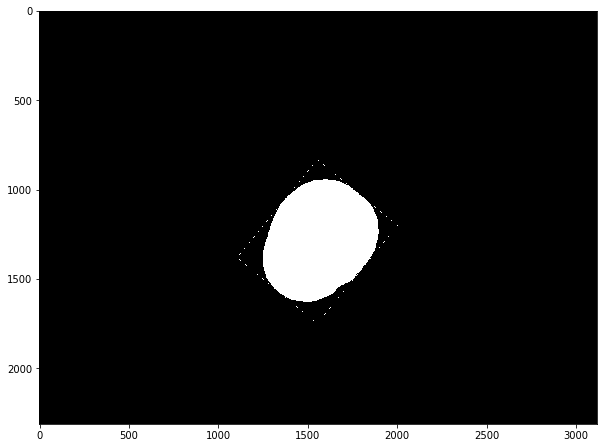

In [319]:
((x,y),(w,h), angle) = cv2.minAreaRect(contours[0]) 
# Es necesario calcular los cuatro esquinas del rectángulo a partir de 
# las variables que devuelve la función minAreaRect
box = cv2.boxPoints(((x,y),(w,h), angle))
box = np.int0(box) # Convertir flotantes a enteros (las posiciones en la imagen son enteros!)
cv2.drawContours(newmask, [box], 0, (255,0,0),1)
plt.figure(figsize=(10,8))
# cv2.imwrite('area.png',mask)
plt.imshow(newmask, cmap='gray')
plt.show()

In [320]:
a = max(w,h)/2
b = min(w,h)/2
print(a,b)
volume = (4/3)*np.pi*a*b*b

353.8884582519531 290.11456298828125


In [321]:
print('Area = {:0.2f}'.format(area))
print('Volume = {:0.2f}'.format(volume))
print('Ratio Area/Volume = {:0.4f}'.format(area/volume))

Area = 328380.50
Volume = 124765372.52
Ratio Area/Volume = 0.0026


-------

In [329]:
names = ['dataset/Single 40x - Anabaena spiroides 1.jpg',
         'dataset/Single 40x - Anabaena spiroides 2.jpg',
         'dataset/Single 40x - Anabaena spiroides 3.jpg',
         'dataset/Single 40x - Anabaena spiroides 4.jpg',
         'dataset/Single 40x - Anabaena spiroides 5.jpg',
         'dataset/Single 40x - Woronichinia naegeliana 1.jpg',
         'dataset/Single 40x - Woronichinia naegeliana 2.jpg',
         'dataset/Single 40x - Woronichinia naegeliana 3.jpg',
         'dataset/Single 40x - Woronichinia naegeliana 4.jpg',
         'dataset/Single 40x - Woronichinia naegeliana 5.jpg',
         'dataset/Single 40x - Woronichinia naegeliana 6.jpg',
         'dataset/Single 40x - Microcystis aeruginosa 1.jpg',
         'dataset/Single 40x - Microcystis aeruginosa 2.jpg',
         'dataset/Single 40x - Microcystis aeruginosa 3.jpg',
         'dataset/Single 40x - Microcystis aeruginosa 4.jpg',
         'dataset/Single 40x - Microcystis flos-aquae 1.jpg',
         'dataset/Single 40x - Microcystis flos-aquae 2.jpg']

# names = ['dataset/Single 40x - Woronichinia naegeliana 1.jpg',
#          'dataset/Single 40x - Woronichinia naegeliana 2.jpg',
#          'dataset/Single 40x - Woronichinia naegeliana 3.jpg',
#          'dataset/Single 40x - Woronichinia naegeliana 4.jpg',
#          'dataset/Single 40x - Woronichinia naegeliana 5.jpg',
#          'dataset/Single 40x - Woronichinia naegeliana 6.jpg',
#          'dataset/Single 40x - Microcystis aeruginosa 1.jpg',
#          'dataset/Single 40x - Microcystis aeruginosa 2.jpg',
#          'dataset/Single 40x - Microcystis aeruginosa 3.jpg',
#          'dataset/Single 40x - Microcystis aeruginosa 4.jpg',
#          'dataset/Single 40x - Microcystis flos-aquae 1.jpg',
#          'dataset/Single 40x - Microcystis flos-aquae 2.jpg']
save = False

for image_name in names:
    short_name = image_name.split('- ')[-1].split('.jpg')[0]
    im = cv2.imread(image_name)
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)

    img = im_lab[:,:,0]
    blur = cv2.GaussianBlur(img,(11,11),0)
#     ret,thresh = cv2.threshold(blur,160,255,0) cambiado a:
    ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
    closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    newimage = np.ones((int(closing.shape[0]*1.5), int(closing.shape[1]*1.5))) * 255
    newimage[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)] = closing

    _, contours, hierarchy = cv2.findContours(((255-newimage)/255.0).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
    contours.sort(key=cv2.contourArea, reverse=True)
    mask = np.zeros(newimage.shape,np.uint8)
    cv2.drawContours(mask,contours,0,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
    area = cv2.contourArea(contours[0])
    for i in range(1,hierarchy.shape[1]):
        if hierarchy[0][i][3] == -1:
            cv2.drawContours(mask,contours,i,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
            area -= cv2.contourArea(contours[i])

    skeleton = skeletonize(mask/255)
#     cv2.imwrite('{}-skeleton.png'.format(short_name),np.uint8(skeleton)*255)

    _, contours, hierarchy = cv2.findContours(skeleton.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
    contours.sort(key=lambda c: cv2.arcLength(c, False), reverse=True)
    perimeter = 0
    for c in contours:
        perimeter += cv2.arcLength(c,False)
    skelemask = np.zeros(skeleton.shape,np.uint8)
    cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=3, lineType=8, hierarchy=hierarchy)

    width = area/perimeter
    volume = np.pi * (width/2)*(width/2) * perimeter
    ratio = perimeter/area
    
    if ratio > 0.075:
        if save:
            cv2.imwrite('{}.png'.format(short_name),im)
            orig_mask = mask[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)]
            cv2.imwrite('{}-area.png'.format(short_name),orig_mask)
            orig_skelemask = skelemask[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)]
            cv2.imwrite('{}-skelemask.png'.format(short_name),orig_skelemask)
        print('---------------------------------------')
        print(short_name)
        print('Species: spiroides detected')
        print('Area = {:0.2f}, Perimeter = {:0.2f}'.format(area,perimeter))
        print('Mean width = {:0.2f}'.format(width))
        print('Volume = {:0.2f}'.format(volume))
        print('Ratio Perimeter/Area = {:0.4f}'.format(ratio))
        print('---------------------------------------')
        continue
    
    _, contours, hierarchy = cv2.findContours(((255-newimage)/255.0).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
    contours.sort(key=cv2.contourArea, reverse=True)
    newmask = np.zeros(newimage.shape,np.uint8)
    cv2.drawContours(newmask,contours,0,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
    area = cv2.contourArea(contours[0])
    perimeter = cv2.arcLength(contours[0],False)
    ratio = perimeter/area
    
    ((x,y),(w,h), angle) = cv2.minAreaRect(contours[0]) 
    # Es necesario calcular los cuatro esquinas del rectángulo a partir de 
    # las variables que devuelve la función minAreaRect
#     box = cv2.boxPoints(((x,y),(w,h), angle))
#     box = np.int0(box) # Convertir flotantes a enteros (las posiciones en la imagen son enteros!)
#     cv2.drawContours(newmask, [box], 0, (255,0,0),1)
    
    a = max(w,h)/2
    b = min(w,h)/2
    volume = (4/3)*np.pi*a*b*b
    
    if save:
        cv2.imwrite('{}.png'.format(short_name),im)
        orig_mask = newmask[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)]
        cv2.imwrite('{}-area.png'.format(short_name),orig_mask)
#         TODO: dibujar el elipsoide?
    print('---------------------------------------')
    print(short_name)
    print('Species: non-spiroides detected')
    print('Area = {:0.2f}, Perimeter = {:0.2f}'.format(area,perimeter))
    print('Mean width = {:0.2f}'.format(width))
    print('Volume = {:0.2f}'.format(volume))
    print('Ratio Perimeter/Area = {:0.4f}'.format(ratio))
    print('---------------------------------------')
    
    


---------------------------------------
Anabaena spiroides 1
Species: spiroides detected
Area = 385940.50, Perimeter = 36260.07
Mean width = 10.64
Volume = 3226279.28
Ratio Perimeter/Area = 0.0940
---------------------------------------
---------------------------------------
Anabaena spiroides 2
Species: spiroides detected
Area = 314558.00, Perimeter = 24712.12
Mean width = 12.73
Volume = 3144715.41
Ratio Perimeter/Area = 0.0786
---------------------------------------
---------------------------------------
Anabaena spiroides 3
Species: spiroides detected
Area = 377858.50, Perimeter = 30158.42
Mean width = 12.53
Volume = 3718258.92
Ratio Perimeter/Area = 0.0798
---------------------------------------
---------------------------------------
Anabaena spiroides 4
Species: spiroides detected
Area = 234792.50, Perimeter = 19184.05
Mean width = 12.24
Volume = 2256929.63
Ratio Perimeter/Area = 0.0817
---------------------------------------
---------------------------------------
Anabaena spi